In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('../AlphaTrade')
from gymnax_exchange.test_scripts import evaluation_new as evaluation

I0000 00:00:1713513765.427664 1538744 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


Num Jax Devices: 1 Device List: [gpu(id=0)]
gpu


In [179]:
# csv_dir = './training_runs/checkpoints_04-12_16-02/csv/'
checkpoint = 16574000

csv_dir = './training_runs/checkpoints_04-12_16-02/csv_sell_week/'
ppo_data_sell = evaluation.load_all_eval_csvs(csv_dir, checkpoint)

csv_dir = './training_runs/checkpoints_04-12_16-02/csv_buy_week/'
ppo_data_buy = evaluation.load_all_eval_csvs(csv_dir, checkpoint)

ppo_data = pd.concat([ppo_data_sell, ppo_data_buy])
ppo_data

,action_0,action_1,advantage_reward,average_price,current_step,delta_time,done,doom_quant,drift_reward,executed_quant,...,spread,step_counter,task_size,task_to_execute,time,time_remaining,total_revenue,trade_duration,vwap_rm,window_index
0,0,0,0.00,0.000000,1,1.954017,False,0,0.000,0,...,13000,1,100,100,34201.957,298.04297,0.00000,0.0000,343278.97,0
1,0,0,0.00,0.000000,2,0.029424,False,0,0.000,0,...,12500,2,100,100,34201.990,298.01172,0.00000,0.0000,343471.22,0
2,0,0,0.00,0.000000,3,0.037923,False,0,0.000,0,...,9000,3,100,100,34202.027,297.97266,0.00000,0.0000,343725.80,0
3,10,0,-688.75,0.011340,4,0.277030,False,0,12028.750,10,...,12500,4,100,100,34202.305,297.69530,0.11340,0.2000,343911.06,0
4,10,0,29.00,0.012095,5,2.115175,False,0,24160.938,20,...,35000,5,100,100,34204.418,295.58203,0.24190,0.4000,344024.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,10,2,-55818.47,-0.011765,93,0.000000,True,0,-61832.406,0,...,10500,0,100,100,55860.050,1559.94920,-1.17651,-972.4499,329378.44,1540
0,10,2,-15050.00,-0.001505,1,0.000000,True,0,0.000,0,...,6300,0,100,100,56160.240,-21600.23800,-0.15050,2190.0000,328749.00,1545
0,10,2,-6200.00,-0.000620,1,0.000000,True,0,0.000,0,...,12400,0,100,100,56460.530,-21600.53100,-0.06200,2189.9998,328713.00,1550
0,10,2,-9124.00,-0.000912,1,0.000000,True,0,0.000,0,...,11000,0,100,100,56760.008,-21600.00800,-0.09124,2189.9998,328663.00,1555


In [182]:
# csv_dir = './training_runs/checkpoints_04-12_16-02/twap_pass_sell/'
csv_dir = './policy_evals/twap_pass_sell/'
twap_data_sell = evaluation.load_all_eval_csvs(csv_dir, "heuristic")

# csv_dir = './training_runs/checkpoints_04-12_16-02/twap_pass_buy/'
csv_dir = './policy_evals/twap_pass_buy/'
twap_data_buy = evaluation.load_all_eval_csvs(csv_dir, "heuristic")

twap_data = pd.concat([twap_data_sell, twap_data_buy])
twap_data

,action_0,action_1,advantage_reward,average_price,current_step,delta_time,done,doom_quant,drift_reward,executed_quant,...,spread,step_counter,task_size,task_to_execute,time,time_remaining,total_revenue,trade_duration,vwap_rm,window_index
0,0.0,4.0,180.1250,0.000600,1,1.954017,False,0,59.875,4,...,13000,1,100,100,34201.957,298.04297,0.00240,0.00000,343278.97,0
1,0.0,0.0,180.1250,0.000600,2,0.029424,False,0,59.875,4,...,12500,2,100,100,34201.990,298.01172,0.00240,0.00000,343471.22,0
2,0.0,0.0,180.1250,0.000600,3,0.037923,False,0,59.875,4,...,9000,3,100,100,34202.027,297.97266,0.00240,0.00000,343725.80,0
3,0.0,0.0,180.1250,0.000600,4,0.277030,False,0,59.875,4,...,12500,4,100,100,34202.305,297.69530,0.00240,0.00000,343911.06,0
4,0.0,0.0,180.1250,0.000600,5,2.115175,False,0,59.875,4,...,32600,5,100,100,34204.418,295.58203,0.00240,0.00000,344027.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.0,14.0,-2631.1875,0.016354,401,0.000000,True,0,166169.310,0,...,10500,0,100,100,55860.050,1559.94920,1.63538,184.25998,329765.10,1540
0,0.0,2.0,-5628.0000,-0.000563,1,0.000000,True,0,0.000,0,...,6300,0,100,100,56160.240,-21600.23800,-0.05627,0.00000,328749.00,1545
0,0.0,2.0,-7400.0000,-0.000740,1,0.000000,True,0,0.000,0,...,12400,0,100,100,56460.530,-21600.53100,-0.07400,0.00000,328713.00,1550
0,0.0,2.0,-6666.0000,-0.000667,1,0.000000,True,0,0.000,0,...,11000,0,100,100,56760.008,-21600.00800,-0.06666,0.00000,328663.00,1555


In [183]:
ppo_data['policy'] = 'ppo'
twap_data['policy'] = 'twap_pass'
data = pd.concat([ppo_data, twap_data])

In [184]:
ppo_data.groupby('window_index').last()

,action_0,action_1,advantage_reward,average_price,current_step,delta_time,done,doom_quant,drift_reward,executed_quant,...,spread,step_counter,task_size,task_to_execute,time,time_remaining,total_revenue,trade_duration,vwap_rm,policy
window_index,,,,,,,,,,,,,,,,,,,,,
0,10,2,-8915.5940,-0.007982,18,0.0,True,0,-70908.340,0,...,11900,0,100,100,34200.004,299.99610,-0.79824,57.739998,344036.97,ppo
5,10,2,509.7500,0.001372,19,0.0,True,0,13214.125,0,...,15500,0,100,100,34500.100,299.89844,0.13724,51.590000,342771.70,ppo
10,10,2,-188.2500,0.003554,14,0.0,True,0,35727.188,0,...,27200,0,100,100,34800.004,299.99610,0.35539,36.380000,342930.66,ppo
15,10,2,-690927.4000,-0.078750,40,0.0,True,0,-96573.410,0,...,18200,0,100,100,35100.020,299.98047,-7.87501,133.869980,344834.40,ppo
20,10,2,-4236.5625,-0.008003,39,0.0,True,0,-75790.875,0,...,11100,0,100,100,35400.023,299.97656,-0.80027,129.709990,345633.44,ppo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,10,2,-55818.4700,-0.011765,93,0.0,True,0,-61832.406,0,...,10500,0,100,100,55860.050,1559.94920,-1.17651,-972.449900,329378.44,ppo
1545,10,2,-15050.0000,-0.001505,1,0.0,True,0,0.000,0,...,6300,0,100,100,56160.240,-21600.23800,-0.15050,2190.000000,328749.00,ppo
1550,10,2,-6200.0000,-0.000620,1,0.0,True,0,0.000,0,...,12400,0,100,100,56460.530,-21600.53100,-0.06200,2189.999800,328713.00,ppo


Text(0.5, 1.0, 'PPO Episode Return Distribution')

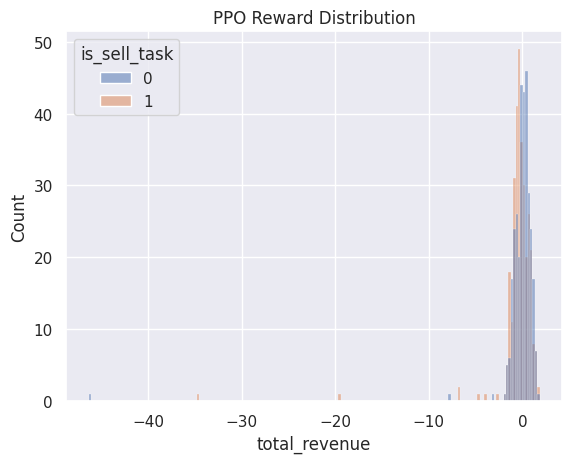

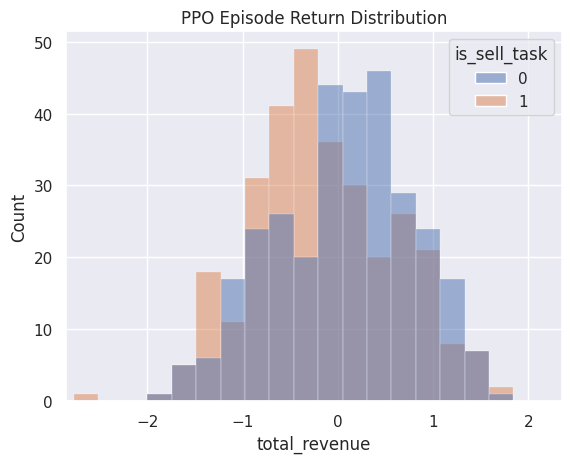

In [185]:
# PPO

plot_data = ppo_data.groupby(['window_index', 'is_sell_task']).last()
mean = plot_data.total_revenue.mean()
std = plot_data.total_revenue.std()

plt.figure()
g = sns.histplot(data=plot_data, x='total_revenue', hue='is_sell_task')
plt.title('PPO Reward Distribution')

plt.figure()
g = sns.histplot(data=plot_data, x='total_revenue', hue='is_sell_task')
g.set(xlim=(mean-1*std, mean+1*std))
plt.title('PPO Episode Return Distribution')

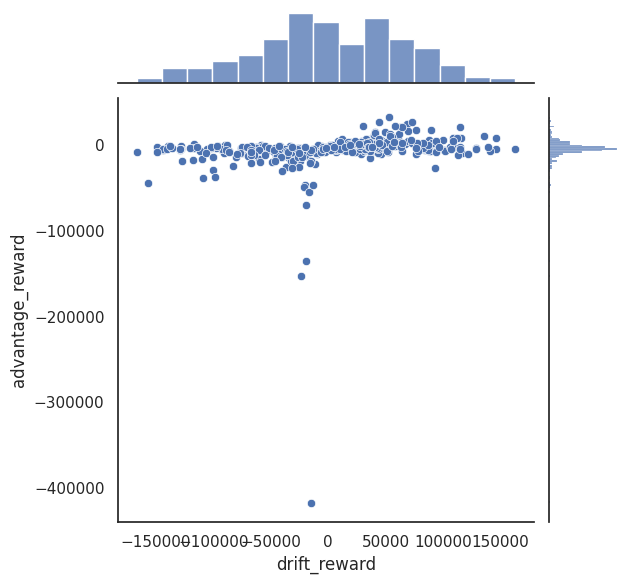

In [53]:
sns.jointplot(
    data=ppo_data.groupby('window_index').last(),
    x='drift_reward',
    y='advantage_reward',
    # kind='hex'
)

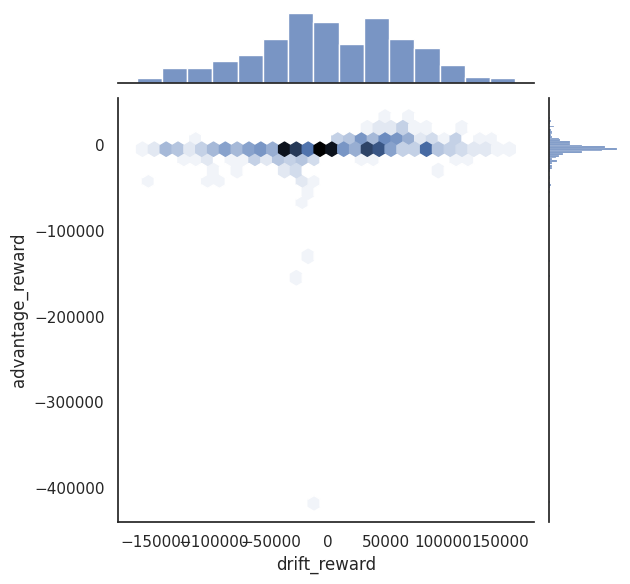

In [54]:
sns.set_theme(style="white")

sns.jointplot(
    data=ppo_data.groupby('window_index').last(),
    x='drift_reward',
    y='advantage_reward',
    kind='hex'
)

## Performance Comparison Stats

In [186]:
data

,action_0,action_1,advantage_reward,average_price,current_step,delta_time,done,doom_quant,drift_reward,executed_quant,...,step_counter,task_size,task_to_execute,time,time_remaining,total_revenue,trade_duration,vwap_rm,window_index,policy
0,0.0,0.0,0.0000,0.000000,1,1.954017,False,0,0.000,0,...,1,100,100,34201.957,298.04297,0.00000,0.00000,343278.97,0,ppo
1,0.0,0.0,0.0000,0.000000,2,0.029424,False,0,0.000,0,...,2,100,100,34201.990,298.01172,0.00000,0.00000,343471.22,0,ppo
2,0.0,0.0,0.0000,0.000000,3,0.037923,False,0,0.000,0,...,3,100,100,34202.027,297.97266,0.00000,0.00000,343725.80,0,ppo
3,10.0,0.0,-688.7500,0.011340,4,0.277030,False,0,12028.750,10,...,4,100,100,34202.305,297.69530,0.11340,0.20000,343911.06,0,ppo
4,10.0,0.0,29.0000,0.012095,5,2.115175,False,0,24160.938,20,...,5,100,100,34204.418,295.58203,0.24190,0.40000,344024.30,0,ppo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.0,14.0,-2631.1875,0.016354,401,0.000000,True,0,166169.310,0,...,0,100,100,55860.050,1559.94920,1.63538,184.25998,329765.10,1540,twap_pass
0,0.0,2.0,-5628.0000,-0.000563,1,0.000000,True,0,0.000,0,...,0,100,100,56160.240,-21600.23800,-0.05627,0.00000,328749.00,1545,twap_pass
0,0.0,2.0,-7400.0000,-0.000740,1,0.000000,True,0,0.000,0,...,0,100,100,56460.530,-21600.53100,-0.07400,0.00000,328713.00,1550,twap_pass
0,0.0,2.0,-6666.0000,-0.000667,1,0.000000,True,0,0.000,0,...,0,100,100,56760.008,-21600.00800,-0.06666,0.00000,328663.00,1555,twap_pass


In [187]:
data.groupby(['policy', 'window_index', 'is_sell_task']).last()

action_0  action_1  advantage_reward  \
policy    window_index is_sell_task                                         
ppo       0            0                 10.0       2.0        -8915.5940   
                       1                 10.0       0.0        -3966.7500   
          5            0                 10.0       2.0          509.7500   
                       1                 10.0       2.0        -7202.1250   
          10           0                 10.0       2.0         -188.2500   
...                                       ...       ...               ...   
twap_pass 1540         1                  0.0      14.0        -2631.1875   
          1545         1                  0.0       2.0        -5628.0000   
          1550         1                  0.0       2.0        -7400.0000   
          1555         1                  0.0       2.0        -6666.0000   
          1560         1                  0.0       2.0        -2300.0000   

                                     average_price  current_step  delta_time  \
policy    window_index is_sell_task                                            
ppo       0            0                 -0.007982            18         0.0   
                       1                  0.008628            13         0.0   
          5            0                  0.001372            19         0.0   
                       1                  0.000470            24         0.0   
          10           0                  0.003554            14         0.0   
...                                            ...           ...         ...   
twap_pass 1540         1                  0.016354           401         0.0   
          1545         1                 -0.000563             1         0.0   
          1550         1                 -0.000740             1         0.0   
          1555         1                 -0.000667             1         0.0   
          1560         1                 -0.000230             1         0.0   

                                     done  doom_quant  drift_reward  \
policy    window_index is_sell_task                                   
ppo       0            0             True           0   -70908.3400   
                       1             True           0    90243.7500   
          5            0             True           0    13214.1250   
                       1             True           0    11903.5625   
          10           0             True           0    35727.1880   
...                                   ...         ...           ...   
twap_pass 1540         1             True           0   166169.3100   
          1545         1             True           0        0.0000   
          1550         1             True           0        0.0000   
          1555         1             True           0        0.0000   
          1560         1             True           0        0.0000   

                                     executed_quant  ...  slippage_rm  spread  \
policy    window_index is_sell_task                  ...                        
ppo       0            0                          0  ...   4434.66750   11900   
                       1                          0  ...   6636.69240   11900   
          5            0                          0  ...   -722.31590   15500   
                       1                          0  ...    195.87500   15500   
          10           0                          0  ...  -2538.50000   27200   
...                                             ...  ...          ...     ...   
twap_pass 1540         1                          0  ...    407.82544   10500   
          1545         1                          0  ...  -5627.00000    6300   
          1550         1                          0  ...  -7400.00000   12400   
          1555         1                          0  ...  -6666.00000   11000   
          1560         1                          0  ...  -2300.00000    4600   

                

In [216]:
data.groupby(['policy', 'window_index', 'is_sell_task']).last() \
    .groupby('policy').mean()[['total_revenue', 'reward', 'advantage_reward', 'drift_reward', 'current_step', 'trade_duration', 'mkt_forced_quant', 'doom_quant']]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /nfs/home/peern/miniconda3/envs/rl_exec/lib/python3.10/site-packages/pandas/core/groupby/groupby │
│ .py:1871 in _agg_py_fallback                                                                     │
│                                                                                                  │
│   1868 │   │   #  should always be preserved by the implemented aggregations                     │
│   1869 │   │   # TODO: Is this exactly right; see WrappedCythonOp get_result_dtype?              │
│   1870 │   │   try:                                                                              │
│ ❱ 1871 │   │   │   res_values = self.grouper.agg_series(ser, alt, preserve_dtype=True)           │
│   1872 │   │   except Exception as err:                                                          │
│   1873 │   │   │   msg = f"agg function failed [how->{how},dtype->{ser.dtype}]"                  │
│   1874 │   │   │   # preserve the kind of exception that raised                                  │
│                                                                                                  │
│ /nfs/home/peern/miniconda3/envs/rl_exec/lib/python3.10/site-packages/pandas/core/groupby/ops.py: │
│ 850 in agg_series                                                                                │
│                                                                                                  │
│    847 │   │   │   #  is sufficiently strict that it casts appropriately.                        │
│    848 │   │   │   preserve_dtype = True                                                         │
│    849 │   │                                                                                     │
│ ❱  850 │   │   result = self._aggregate_series_pure_python(obj, func)                            │
│    851 │   │                                                                                     │
│    852 │   │   npvalues = lib.maybe_convert_objects(result, try_float=False)                     │
│    853 │   │   if preserve_dtype:                                                                │
│                                                                                                  │
│ /nfs/home/peern/miniconda3/envs/rl_exec/lib/python3.10/site-packages/pandas/core/groupby/ops.py: │
│ 871 in _aggregate_series_pure_python                                                             │
│                                                                                                  │
│    868 │   │   splitter = self._get_splitter(obj, axis=0)                                        │
│    869 │   │                                                                                     │
│    870 │   │   for i, group in enumerate(splitter):                                              │
│ ❱  871 │   │   │   res = func(group)                                                             │
│    872 │   │   │   res = extract_result(res)                                                     │
│    873 │   │   │                                                                                 │
│    874 │   │   │   if not initialized:                                                           │
│                                                                                                  │
│ /nfs/home/peern/miniconda3/envs/rl_exec/lib/python3.10/site-packages/pandas/core/groupby/groupby │
│ .py:2377 in <lambda>                                                                             │
│                                                                                                  │
│   2374 │   │   else:                                                                             │
│   2375 │   │   │   result = self._cython_agg_general(                                            │
│   2376 │   │   │   │   "mean",                             

In [ ]:
data.groupby(['policy', 'window_index', 'is_sell_task']).last()\
    .groupby(['policy', 'is_sell_task']).mean()[['total_revenue', 'reward', 'advantage_reward', 'drift_reward', 'current_step', 'trade_duration', 'mkt_forced_quant', 'doom_quant']]

total_revenue    reward  advantage_reward  \
policy    is_sell_task                                              
ppo       0                 -0.262564 -0.262393     -22065.389295   
          1                 -0.132263 -0.136184     -15992.527200   
twap_pass 0                 -0.288811 -0.260802     -22102.319651   
          1                 -0.038786 -0.056264      -3526.942838   

                        drift_reward  current_step  trade_duration  \
policy    is_sell_task                                               
ppo       0             -4191.016494     22.215026       84.949660   
          1              2766.242463     23.940415       96.468364   
twap_pass 0             -6778.835482     42.862694      147.136784   
          1              -351.631773     42.613990      148.764011   

                        mkt_forced_quant  doom_quant  
policy    is_sell_task                                
ppo       0                     7.025907    0.207254  
          1                     7.033679    0.098446  
twap_pass 0                    12.352332    0.212435  
          1                    10.129534    0.000000

In [ ]:
data.groupby(['policy', 'is_sell_task'])[['action_0', 'action_1']].describe()

action_0                                           \
                          count      mean       std  min  25%  50%   75%   
policy    is_sell_task                                                     
ppo       0              8575.0  4.045948  4.858649  0.0  0.0  0.0  10.0   
          1              9241.0  3.794503  4.835170  0.0  0.0  0.0  10.0   
twap_pass 0             16545.0  0.000000  0.000000  0.0  0.0  0.0   0.0   
          1             16449.0  0.000000  0.000000  0.0  0.0  0.0   0.0   

                             action_1                                      \
                         max    count      mean        std  min  25%  50%   
policy    is_sell_task                                                      
ppo       0             10.0   8575.0  1.386006   0.949895  0.0  0.0  2.0   
          1             10.0   9241.0  1.469646   0.902002  0.0  0.0  2.0   
twap_pass 0              0.0  16545.0  7.647144  12.004633  0.0  2.0  4.0   
          1              0.0  16449.0  7.769591  12.376851  0.0  2.0  4.0   

                                    
                        75%    max  
policy    is_sell_task              
ppo       0             2.0    8.0  
          1             2.0    8.0  
twap_pass 0             8.0  168.0  
          1             8.0  192.0

## Performance Comparison Plots

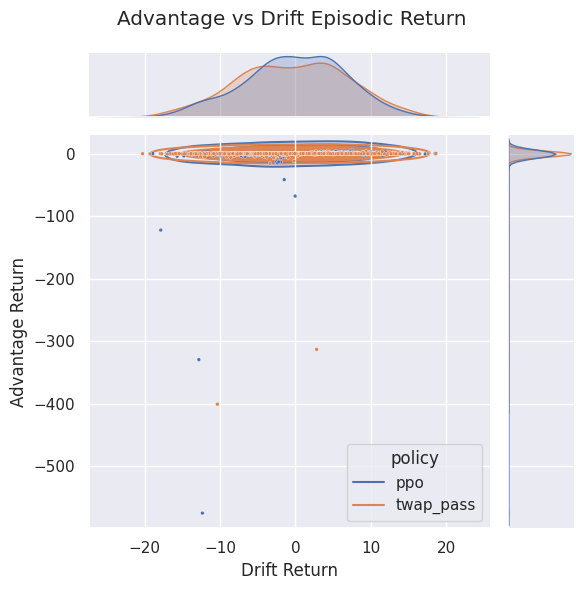

In [ ]:
sns.set_theme(style="darkgrid")

plot_data = data.groupby(['policy', 'window_index', 'is_sell_task']).last()
plot_data.drift_reward /= 1e4
plot_data.advantage_reward /= 1e4

g = sns.jointplot(
    data=plot_data,
    x="drift_reward",
    y="advantage_reward",
    kind="scatter",
    hue="policy",
    s=7,
)
# g.plot_joint(sns.scatterplot, color="black", zorder=2)
g.plot_joint(sns.kdeplot, zorder=0, levels=8)
# g.plot_marginals(sns.rugplot, height=-.15, clip_on=False)


# set x and y axis labels
g.set_axis_labels("Drift Return", "Advantage Return")
g.figure.suptitle("Advantage vs Drift Episodic Return")
plt.tight_layout()

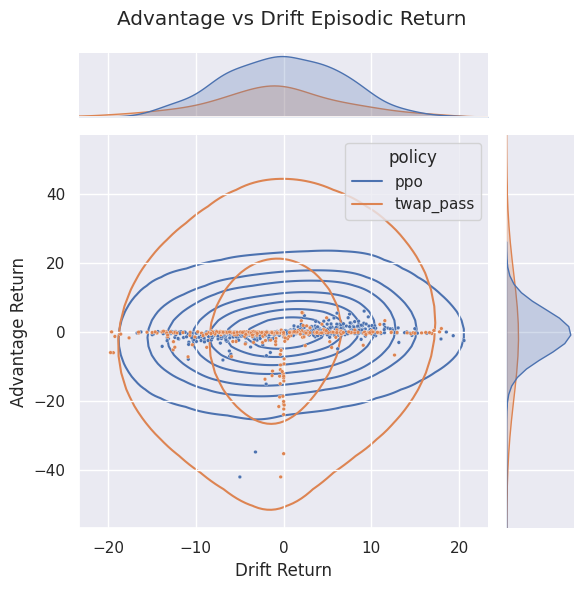

In [189]:
sns.set_theme(style="darkgrid")

plot_data = data.groupby(['policy', 'window_index', 'is_sell_task']).last()
plot_data.drift_reward /= 1e4
plot_data.advantage_reward /= 1e4

x_std = plot_data.drift_reward.std()
y_std = plot_data.advantage_reward.std()
g = sns.jointplot(
    data=plot_data,
    x="drift_reward",
    y="advantage_reward",
    kind="scatter",
    hue="policy",
    s=7,
    xlim = (-3 * x_std, 3 * x_std),
    ylim = (-1.5 * y_std, 1.5 * y_std),
)
# g.plot_joint(sns.scatterplot, color="black", zorder=2)
g.plot_joint(sns.kdeplot, zorder=0, levels=8)
# g.plot_marginals(sns.rugplot, height=-.15, clip_on=False)

# set x and y axis labels
g.set_axis_labels("Drift Return", "Advantage Return")
g.figure.suptitle("Advantage vs Drift Episodic Return")
plt.tight_layout()

Text(0.5, 1.0, 'Episodic Return Comparison for PPO and TWAP (Pass) Policies')

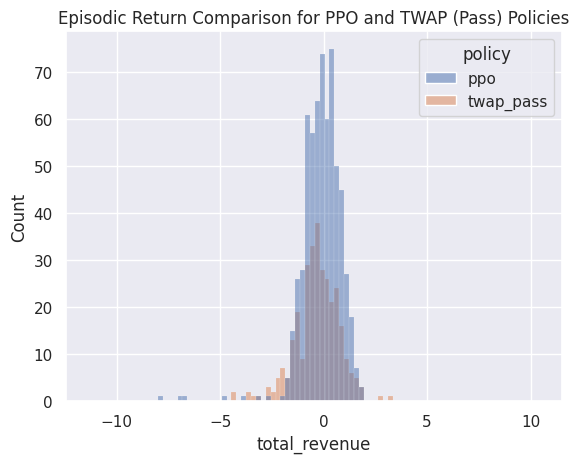

In [194]:
plot_data = data.groupby(['policy', 'window_index', 'is_sell_task']).last()
sns.histplot(
    data=plot_data,
    x='total_revenue',
    hue='policy'
)
# set x-range relative to std
mean = plot_data.total_revenue.mean()
std = plot_data.total_revenue.std()
std_factor = 3.
plt.xlim(mean - std_factor*std, mean + std_factor*std)
plt.title('Episodic Return Comparison for PPO and TWAP (Pass) Policies')

Text(0.5, 1.0, 'Advantage Return Comparison for PPO and TWAP (Pass) Policies')

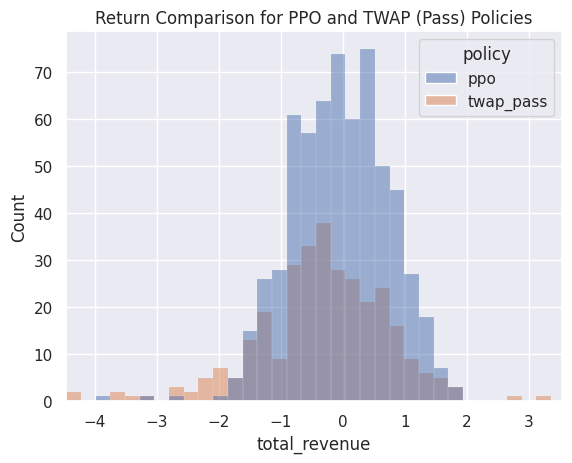

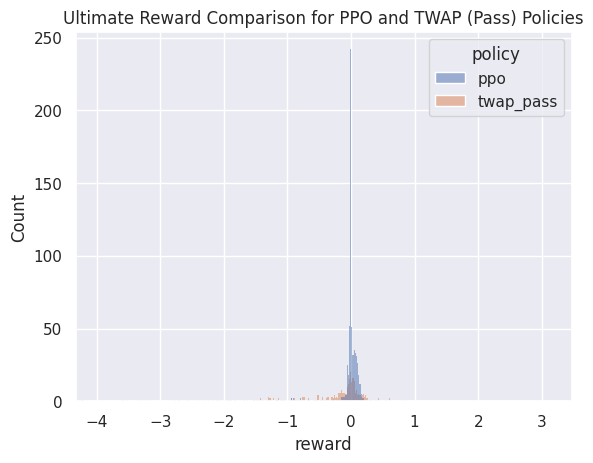

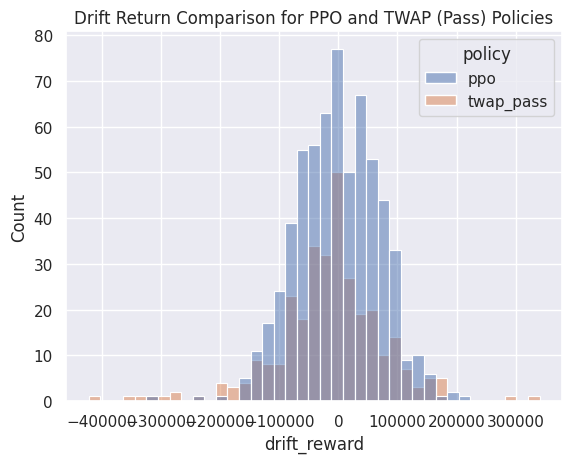

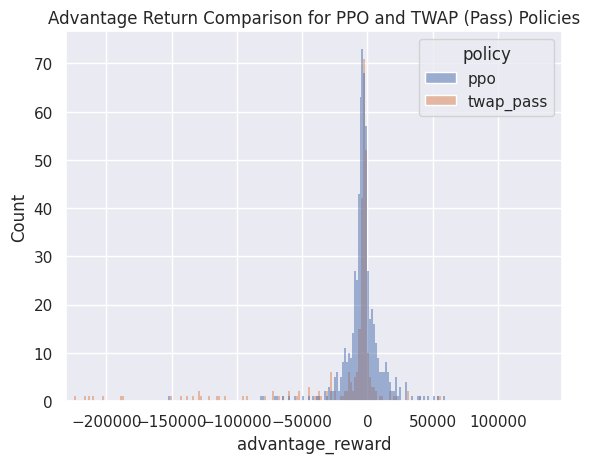

In [195]:
plot_data = data.groupby(['policy', 'window_index', 'is_sell_task']).last()

sns.histplot(
    data=plot_data,
    x='total_revenue',
    hue='policy'
)
# set x-range relative to std
mean = plot_data.total_revenue.mean()
std = plot_data.total_revenue.std()
std_factor = 1.
plt.xlim(mean - std_factor*std, mean + std_factor*std)
plt.title('Return Comparison for PPO and TWAP (Pass) Policies')

plt.figure()
sns.histplot(
    data=plot_data,
    x='reward',
    hue='policy'
)
# set x-range relative to std
mean = plot_data.reward.mean()
std = plot_data.reward.std()
std_factor = 1.
plt.xlim(mean - std_factor*std, mean + std_factor*std)
plt.title('Ultimate Reward Comparison for PPO and TWAP (Pass) Policies')

plt.figure()
sns.histplot(
    data=plot_data,
    x='drift_reward',
    hue='policy'
)
plt.title('Drift Return Comparison for PPO and TWAP (Pass) Policies')

plt.figure()
sns.histplot(
    data=plot_data,
    x='advantage_reward',
    hue='policy'
)
# set x-range relative to std
mean = plot_data.advantage_reward.mean()
std = plot_data.advantage_reward.std()
std_factor = 0.5
plt.xlim(mean - std_factor*std, mean + std_factor*std)
plt.title('Advantage Return Comparison for PPO and TWAP (Pass) Policies')

In [196]:
data.groupby(['policy', 'is_sell_task', 'window_index']).last()

action_0  action_1  advantage_reward  \
policy    is_sell_task window_index                                         
ppo       0            0                 10.0       2.0        -8915.5940   
                       5                 10.0       2.0          509.7500   
                       10                10.0       2.0         -188.2500   
                       15                10.0       2.0      -690927.4000   
                       20                10.0       2.0        -4236.5625   
...                                       ...       ...               ...   
twap_pass 1            1540               0.0      14.0        -2631.1875   
                       1545               0.0       2.0        -5628.0000   
                       1550               0.0       2.0        -7400.0000   
                       1555               0.0       2.0        -6666.0000   
                       1560               0.0       2.0        -2300.0000   

                                     average_price  current_step  delta_time  \
policy    is_sell_task window_index                                            
ppo       0            0                 -0.007982            18         0.0   
                       5                  0.001372            19         0.0   
                       10                 0.003554            14         0.0   
                       15                -0.078750            40         0.0   
                       20                -0.008003            39         0.0   
...                                            ...           ...         ...   
twap_pass 1            1540               0.016354           401         0.0   
                       1545              -0.000563             1         0.0   
                       1550              -0.000740             1         0.0   
                       1555              -0.000667             1         0.0   
                       1560              -0.000230             1         0.0   

                                     done  doom_quant  drift_reward  \
policy    is_sell_task window_index                                   
ppo       0            0             True           0    -70908.340   
                       5             True           0     13214.125   
                       10            True           0     35727.188   
                       15            True           0    -96573.410   
                       20            True           0    -75790.875   
...                                   ...         ...           ...   
twap_pass 1            1540          True           0    166169.310   
                       1545          True           0         0.000   
                       1550          True           0         0.000   
                       1555          True           0         0.000   
                       1560          True           0         0.000   

                                     executed_quant  ...  slippage_rm  spread  \
policy    is_sell_task window_index                  ...                        
ppo       0            0                          0  ...   4434.66750   11900   
                       5                          0  ...   -722.31590   15500   
                       10                         0  ...  -2538.50000   27200   
                       15                         0  ...  19687.52500   18200   
                       20                         0  ...   2051.97460   11100   
...                                             ...  ...          ...     ...   
twap_pass 1            1540                       0  ...    407.82544   10500   
                       1545                       0  ...  -5627.00000    6300   
                       1550                       0  ...  -7400.00000   12400   
                       1555                       0  ...  -6666.00000   11000   
                       1560                       0  ...  -2300.00000    4600   

                

## Performance Comparison for Same Level (same data and direction)

In [197]:
# compare PPO with heuristic data for same window_index (level) and task direction
data_comp = pd.merge(
    ppo_data.groupby(['window_index', 'is_sell_task']).last(),
    twap_data.groupby(['window_index', 'is_sell_task']).last(),
    on=['window_index', 'is_sell_task'],
    suffixes=('_ppo', '_twap')
)
data_comp

,,action_0_ppo,action_1_ppo,advantage_reward_ppo,average_price_ppo,current_step_ppo,delta_time_ppo,done_ppo,doom_quant_ppo,drift_reward_ppo,executed_quant_ppo,...,spread_twap,step_counter_twap,task_size_twap,task_to_execute_twap,time_twap,time_remaining_twap,total_revenue_twap,trade_duration_twap,vwap_rm_twap,policy_twap
window_index,is_sell_task,,,,,,,,,,,,,,,,,,,,,
0,1,10,0,-3966.750,0.008628,13,0.0,True,0,90243.7500,0,...,11900,0,100,100,34200.004,299.99610,0.02320,175.73000,334395.78,twap_pass
5,1,10,2,-7202.125,0.000470,24,0.0,True,0,11903.5625,0,...,15500,0,100,100,34500.100,299.89844,0.35463,152.60000,343079.20,twap_pass
10,1,10,2,-7629.750,0.004570,26,0.0,True,0,53330.3750,0,...,27200,0,100,100,34800.004,299.99610,0.31304,156.88000,343570.66,twap_pass
15,1,10,0,-5912.750,0.007840,16,0.0,True,0,84316.8750,0,...,18200,0,100,100,35100.020,299.98047,0.88218,132.75000,344939.20,twap_pass
20,1,10,0,-9336.000,0.002988,11,0.0,True,0,39216.7500,0,...,11100,0,100,100,35400.023,299.97656,0.77372,133.89001,345815.00,twap_pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1,10,0,33904.938,0.008522,81,0.0,True,0,51313.0620,0,...,10500,0,100,100,55860.050,1559.94920,1.63538,184.25998,329765.10,twap_pass
1545,1,10,2,-5628.000,-0.000563,1,0.0,True,0,0.0000,0,...,6300,0,100,100,56160.240,-21600.23800,-0.05627,0.00000,328749.00,twap_pass
1550,1,10,2,-7400.000,-0.000740,1,0.0,True,0,0.0000,0,...,12400,0,100,100,56460.530,-21600.53100,-0.07400,0.00000,328713.00,twap_pass


In [198]:
outperformance = data_comp.total_revenue_ppo - data_comp.total_revenue_twap
outperformance.name = 'PPO_outperformance'

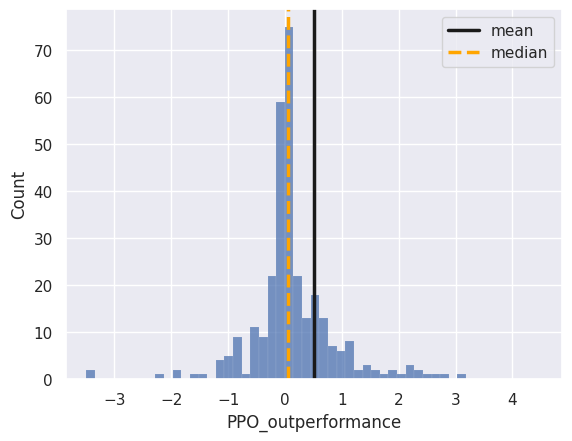

In [199]:
sns.histplot(
    outperformance,
)
# set x-range relative to std
mean = outperformance.mean()
median = outperformance.median()
std = outperformance.std()
std_factor = 0.8
plt.xlim(mean - std_factor*std, mean + std_factor*std)
# plt.title('Return Comparison for PPO and TWAP (Pass) Policies')

plt.axvline(mean, c='k', ls='-', lw=2.5, label='mean')
plt.axvline(median, c='orange', ls='--', lw=2.5, label='median')
plt.legend()

In [200]:
(outperformance > 0).sum() / len(outperformance)
# --> PPO outperforms TWAP in 51.8% of cases
#     worse mean performance driven by some outliers

0.5654952076677316

## Execution Curves

In [201]:
data.columns

Index(['action_0', 'action_1', 'advantage_reward', 'average_price',
       'current_step', 'delta_time', 'done', 'doom_quant', 'drift_reward',
       'executed_quant', 'init_price', 'is_sell_task', 'max_steps',
       'mkt_forced_quant', 'p_aggr', 'p_pass', 'prev_action', 'prev_executed',
       'prev_executed_ratio', 'price_adv_rm', 'price_drift_rm', 'q_aggr',
       'q_pass', 'q_pass2', 'quant_executed', 'remaining_quant',
       'remaining_ratio', 'reward', 'slippage_rm', 'spread', 'step_counter',
       'task_size', 'task_to_execute', 'time', 'time_remaining',
       'total_revenue', 'trade_duration', 'vwap_rm', 'window_index', 'policy'],
      dtype='object')

In [ ]:
data.groupby(['policy', 'is_sell_task', 'window_index']).first()

In [219]:
# episode_duration = data.groupby(['policy', 'is_sell_task', 'window_index']).first().time_remaining
# episode_duration.name = 'episode_duration'

# # TODO: fix episode_duration

# # merge in episode_duration
# data = pd.merge(
#     data,
#     episode_duration,
#     how='left',
#     left_on=['policy', 'is_sell_task', 'window_index'],
#     right_index=True,
# )

data['episode_duration'] = 5 * 60
data['time_elapsed'] = data.episode_duration - data.time_remaining

In [221]:
data['run_id'] = data.groupby(['policy', 'window_index', 'is_sell_task']).ngroup()

In [223]:
data.time_elapsed.describe()

count    139333.000000
mean        570.685403
std         476.346993
min         -21.816400
25%         151.128910
50%         414.691400
75%         977.300830
max        1554.089894
dtype: float64

<Axes: xlabel='time_elapsed', ylabel='quant_executed'>

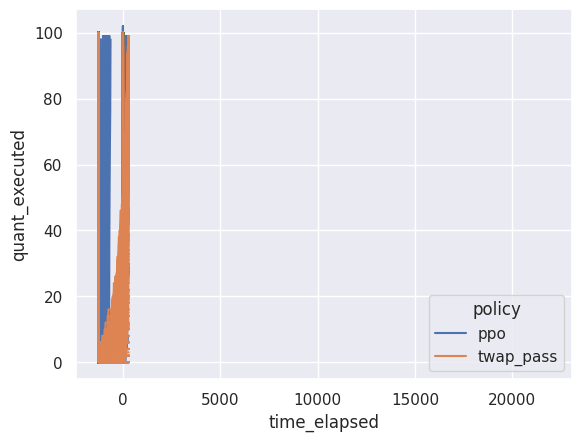

In [222]:
# TODO: make this work with units (and fix calculation on x axis)

sns.lineplot(
    data=data, #.groupby(['policy', 'window_index', 'is_sell_task']).last(),
    x='time_elapsed',
    y='quant_executed',
    hue='policy',
    units='run_id',
    estimator=None,
)

In [224]:
data.time_elapsed

0      0.00000
1      0.03125
2      0.07031
3      0.34767
4      2.46094
        ...   
400   -3.34760
0      0.00000
0      0.00000
0      0.00000
0      0.00000
Length: 139333, dtype: float64

In [ ]:
# TODO: fix time_elapsed. why can this be negative
#       fix plot above...
#       why is quant_executed > 100 sometimes?